# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

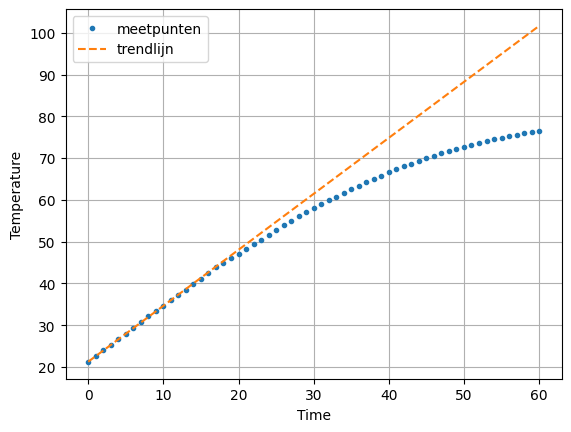

In [6]:
# Opgave 1
# meetdata in numpy arrays opslaan
data = np.loadtxt('tempmetingen.csv',delimiter=';',skiprows=1)

time= data[:,0] # in min
Temp= data[:,1] # in °C

def Theory(x,a,b):
    y = a*x+b
    return y

val,cov = curve_fit(Theory,time[0:5],Temp[0:5])

#plotten van meetdata en verwachtingslijn
plt.figure()
plt.plot(time,Temp,'.',label='meetpunten')
plt.plot(time,Theory(time,*val),'--',label='trendlijn')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Opgave 2

# aanname: het kost 2574 Joul 1g water te koken, vanaf 293K en 1 atm pressure
# aanname: we gaan ervan uit dat water een soortelijke warmte van 4.186 J/gK 

# massa van de meetbeker, het water aan het begin en aan het eind:
m_maatbeker = 820.8 #g
m_maatbeker_water_start = 1292.9 #g
m_maatbeker_water_eind = 1274.9 #g

m_water_start = m_maatbeker_water_start - m_maatbeker
m_water_eind  = m_maatbeker_water_eind - m_maatbeker

# massa van het verdampte water
delta_m = m_water_start - m_water_eind

# Uit de aanname: Energie om 1g water te verdampen
E_g_verdamping = 2574 #J

# Energie die benodigd wordt om het uiteindelijk verdampte water te verdampen
E_verdamping = delta_m * E_g_verdamping
print("Er werden ",E_verdamping, "J opgebracht voor het verdampte water")

# temperatuur van het water aan het start en eind:
Temp_start = Temp[0] + 273.15 #K
Temp_eind = Temp[-1] + 273.15 #K

# Uit de aanname: soortlijke warmte water
cv= 4.186 # J/gK

# warmte om het overgebleven water op Temp_eind optewarmen
E_opwarming = (Temp_eind - Temp_start)*cv*m_water_eind
print("Er werden ",E_opwarming, "J opgebracht voor het opgewarmte water")

# totale toegevoegde warmte volgens meetdata
delta_Q = E_opwarming + E_verdamping
print('Er werden', delta_Q, "J opgebracht volgens het experiment")

# totale toegevoegde warmte volgens trendlijn
delta_T = Theory(time[-1],*val) - Theory(time[0],*val)

delta_Q_trend = cv * delta_T * m_water_start

print('Er werden', delta_Q_trend, 'J opgebracht volgens de trendlijn')

# strijdigheidsanalyse.




Er werden  46332.0 J opgebracht voor het verdampte water
Er werden  105307.7880400001 J opgebracht voor het opgewarmte water
Er werden 151639.7880400001 J opgebracht volgens het experiment
Er werden 158887.33223999979 J opgebracht volgens de trendlijn


In [14]:
#Opgave 3

# als vervolgonderzoek: voor verbetering van het experiment, om het thermodynamischse process beter te onderzoeken, kunnen we een varierende wartebon met een andere watttage. En electrische vermoge moet gemeten worden

## Vraag hoe ken ik de totale toegevoegde energie?? De eenige manier die ik ken is de som van E_verdamping en E_opwarming als warmte verwaarloosd wordt.